In [135]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [136]:
image_dir = "./clothes_data"
model_dir = "./models"

In [137]:
feature_list = list(pd.read_csv("feature_list.csv")["name"])
print(feature_list)
brand_list = list(pd.read_csv("brand_list.csv")["brand"])
print(brand_list)

['Shirt', 'T-Shirt', '上半身 Top', '下半身 Bottom', '休閒褲/裙 casual pants/skirt', '吊帶褲/裙 overalls/jumper skirt', '外套 Jacket', '工裝褲/裙 cargo pants/skirt', '毛衣、針/織衣 Sweater', '毛衣、針織衣 Sweater', '洋裝 Dress', '牛仔材質 Denim', '牛仔褲/裙 jeans / demi skirt', '百褶裙 pleated skirt', '網紗 Mesh', '緊身褲 leggings', '羽絨衣 Down coat / jacket', '背心 Vest', '裙子 skirt', '褲子 pants', '西裝 Suit', '西裝褲、裙 dress pants、skirt', '連帽衣 Hoodie', '運動材質 Sport Tops', '運動褲/裙 sweat pants / sports skirt']
['50 percent', 'AIR SPACE', 'Adidas', 'Caco', 'GAP', 'H&M', 'Lativ', 'Net', 'New Balance', 'Nike', 'PAZZO', 'Puma', 'Queen Shop', 'Timberland', 'Under Armour', 'Uniqlo']


In [138]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_height, img_width = 180, 180


def load_and_preprocess_image(filepath):
    img = load_img(filepath, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    return img_array

In [139]:
from tensorflow.keras.models import load_model


def predict_one_feature(test_image, feature_id):
    try:
        id = 0
        loaded_model = load_model(
            os.path.join(model_dir, f"model_feature_{feature_id}_{id}.keras")
        )
        test_image = np.expand_dims(test_image, axis=0)
        prediction = loaded_model.predict(test_image)
        return 1 if prediction[0][0] > 0.5 else 0
    except Exception as e:
        print(e)
        return 0


def predict_brand(test_image):
    try:
        id = 0
        loaded_model = load_model(os.path.join(model_dir, f"model_brand_{id}.keras"))
        test_image = np.expand_dims(test_image, axis=0)
        prediction = loaded_model.predict(test_image)
        predicted_classes = np.argmax(prediction, axis=1)
        return predicted_classes
    except Exception as e:
        print(e)
        pass


def predict_length(test_image):
    try:
        id = 0
        loaded_model = load_model(os.path.join(model_dir, f"model_length_{id}.keras"))
        test_image = np.expand_dims(test_image, axis=0)
        prediction = loaded_model.predict(test_image)
        return 1 if prediction[0][0] > 0.5 else 0
    except Exception as e:
        print(e)
        pass

In [140]:
def predict_all(test_img):
    predictions = {}
    brand = predict_brand(test_img)
    for i in range(len(brand_list)):
        predictions[f"品牌 Brand_{i}"] = 1 if brand == i else 0
    # predictions["brand"] = brand
    for i in range(len(feature_list)):
        feature = feature_list[i]
        pred = predict_one_feature(test_img, i)
        predictions[feature] = pred
    print("predictions:", predictions)
    predictions_df = pd.DataFrame([predictions])
    predictions_df = predictions_df[sorted(predictions_df.columns)]
    return predictions_df

In [141]:
from joblib import load
import pickle


def predict_price(classify_res):

    # Load the model using pickle
    with open("./models/random_forest_model.pkl", "rb") as f:
        loaded_model = pickle.load(f)
    loaded_model = load("./models/random_forest_model.joblib")
    price = loaded_model.predict(classify_res)
    return price

510 ./clothes_data\image_00510.jpg 649


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
File not found: filepath=./models\model_feature_4_0.keras. Please ensure the file is an accessible `.keras` zip file.
File not found: filepath=./models\model_feature_5_0.keras. Please ensure the file is an accessible `.keras` zip file.
File not found: filepath=./models\model_feature_6_0.keras. Please ensure the file is an accessible `.keras` zip file.
File not found: filepath=./models\model_feature_7_0.keras. Please ensure the file is an accessible `.keras` zip file.
File not found: filepath=./models\model_feature_8_0.keras. Please ensure the file is an accessible `.keras` zip file.
File not found: filepath=./models\model_feature_9_0.keras. Please ensure the file is an accessible `.keras` zip file.
File not found: filepath=./models\model_feature_10_0.keras. Please ensure the file is an accessib

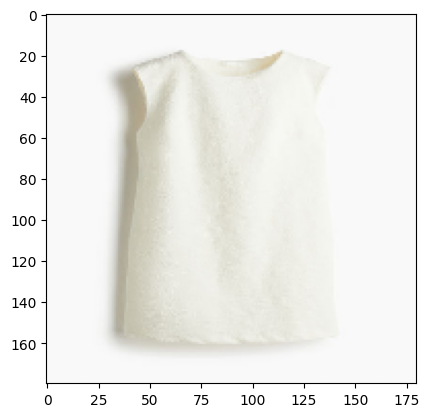

In [142]:
df = pd.read_csv("processed.csv")
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df = df.drop(df.index[df.index % 10 != 0])
df["filepath"] = df["照片 Picture"].apply(lambda x: os.path.join(image_dir, f"{x}"))
df = df.sample(n=1)

cnt = 5
for id, filepath, ans in zip(df.index, df["filepath"], df["價格 Price"]):
    if cnt < 0:
        break
    print(id, filepath, ans)
    img = load_and_preprocess_image(filepath)
    plt.imshow(img)
    pred = predict_all(img)
    print(pred)
    price = predict_price(pred)
    print("price:", price)
    cnt -= 1